This study tries to predict animal face use 4 different algorithms:
1. Logistic regression classification
1. SVM (Support Vector Machine) classification
1. Random forest classification
1. Decision tree classification


* The dataset contains 3 animal: cat, dog, and wild
* Source dataset: https://www.kaggle.com/andrewmvd/animal-faces

In [136]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use("seaborn-whitegrid")
import matplotlib.image as implt
from PIL import Image
import seaborn as sns
import cv2 as cs2
import os
import shutil
import random
import os.path
import pickle

import warnings
warnings.filterwarnings('ignore')

In [158]:
## import Keras and its module for image processing and model building
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.layers import Activation, Dropout, Flatten, Dense, BatchNormalization
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import optimizers

# Process the data 

The dataset came with only two divisions: a training dataset and a test dataset, in different folders.
However, we would also need a third division: a validation dataset in which we would train against before testing the final accuracy on the test dataset. This would allow us to avoid overfitting due to training samples in the dataset that we used to test.

We also need to shuffle the wild dataset into the new validation folder, because it seems that the images are not ramdomly distributed there (there seems to be some rough division according to each wild species, such as foxes, tigers, leons, and so on.)



In [4]:
original_dataset_dir = r'C:\Users\Pedro\Documents\Python Scripts\cv_animalfaces\input\animal-faces\all'

base_dir = r'C:\Users\Pedro\Documents\Python Scripts\cv_animalfaces\input'

train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')
test_dir = os.path.join(base_dir, 'test')
train_cats_dir = os.path.join(train_dir, 'cats')
train_dogs_dir = os.path.join(train_dir, 'dogs')
train_dogs_dir = os.path.join(train_dir, 'wild')
validation_cats_dir = os.path.join(validation_dir, 'cats')
validation_dogs_dir = os.path.join(validation_dir, 'dogs')
train_dogs_dir = os.path.join(validation_dir, 'wild')
test_cats_dir = os.path.join(test_dir, 'cats')
test_dogs_dir = os.path.join(test_dir, 'dogs')
train_dogs_dir = os.path.join(test_dir, 'wild')

In [ ]:
os.mkdir(base_dir)
os.mkdir(train_dir)
os.mkdir(validation_dir)
os.mkdir(test_dir)
os.mkdir(train_cats_dir)
os.mkdir(train_dogs_dir)
os.mkdir(train_dogs_dir)
os.mkdir(validation_cats_dir)
os.mkdir(validation_dogs_dir)
os.mkdir(train_dogs_dir)
os.mkdir(test_cats_dir)
os.mkdir(test_dogs_dir)
os.mkdir(train_dogs_dir)

In [5]:
src_cat = os.path.join(original_dataset_dir, 'cat')
src_cat_imgs = (os.listdir(src_cat))

src_dog = os.path.join(original_dataset_dir, 'dog')
src_dog_imgs = (os.listdir(src_dog))

src_wild = os.path.join(original_dataset_dir, 'wild')
src_wild_imgs = (os.listdir(src_wild))

def valid_path(dir_path, filename):
    full_path = os.path.join(dir_path, filename)
    return os.path.isfile(full_path)

In [6]:
print(f'Cat images:{len(src_cat_imgs)}')
print(f'Dog images:{len(src_dog_imgs)}')
print(f'Wild images:{len(src_wild_imgs)}')

Cat images:2
Dog images:2
Wild images:2


## Move files into respective directories

We will split the dataset in the following ratio:
1. Training dataset 70%
2. Validation dataset 15%
3. Test dataset 15%

In [14]:
# Test

cat_files = [os.path.join(src_cat, f) for f in src_cat_imgs if valid_path(src_cat, f)]
choices = random.sample(cat_files, int(len(src_cat_imgs)*0.15)) # 15%
test_cat = r'C:\Users\Pedro\Documents\Python Scripts\cv_animalfaces\input\test\cats'
for files in choices:
    shutil.move(files, test_cat)

dog_files = [os.path.join(src_dog, f) for f in src_dog_imgs if valid_path(src_dog, f)]
choices = random.sample(dog_files, int(len(src_dog_imgs)*0.15))
test_dog = r'C:\Users\Pedro\Documents\Python Scripts\cv_animalfaces\input\test\dogs'
for files in choices:
    shutil.move(files, test_dog)

wild_files = [os.path.join(src_wild, f) for f in src_wild_imgs if valid_path(src_wild, f)]
choices = random.sample(wild_files, int(len(src_wild_imgs)*0.15))
test_wild = r'C:\Users\Pedro\Documents\Python Scripts\cv_animalfaces\input\test\wild'
for files in choices:
    shutil.move(files, test_wild)

In [13]:
# Validation

cat_files = [os.path.join(src_cat, f) for f in src_cat_imgs if valid_path(src_cat, f)]
choices = random.sample(cat_files, int(len(src_cat_imgs)*0.15)) # 15%
val_cat = r'C:\Users\Pedro\Documents\Python Scripts\cv_animalfaces\input\validation\cats'
for files in choices:
    shutil.move(files, val_cat)

dog_files = [os.path.join(src_dog, f) for f in src_dog_imgs if valid_path(src_dog, f)]
choices = random.sample(dog_files, int(len(src_dog_imgs)*0.15))
val_dog = r'C:\Users\Pedro\Documents\Python Scripts\cv_animalfaces\input\validation\dogs'
for files in choices:
    shutil.move(files, val_dog)

wild_files = [os.path.join(src_wild, f) for f in src_wild_imgs if valid_path(src_wild, f)]
choices = random.sample(wild_files, int(len(src_wild_imgs)*0.15))
val_wild = r'C:\Users\Pedro\Documents\Python Scripts\cv_animalfaces\input\validation\wild'
for files in choices:
    shutil.move(files, val_wild)

In [15]:
# Training

cat_files = [os.path.join(src_cat, f) for f in src_cat_imgs if valid_path(src_cat, f)]
choices = random.sample(cat_files, int(len(src_cat_imgs)*0.70)) # 70%
train_cat = r'C:\Users\Pedro\Documents\Python Scripts\cv_animalfaces\input\train\cats'
for files in choices:
    shutil.move(files, train_cat)

dog_files = [os.path.join(src_dog, f) for f in src_dog_imgs if valid_path(src_dog, f)]
choices = random.sample(dog_files, int(len(src_dog_imgs)*0.70))
train_dog = r'C:\Users\Pedro\Documents\Python Scripts\cv_animalfaces\input\train\dogs'
for files in choices:
    shutil.move(files, train_dog)

wild_files = [os.path.join(src_wild, f) for f in src_wild_imgs if valid_path(src_wild, f)]
choices = random.sample(wild_files, int(len(src_wild_imgs)*0.70))
train_wild = r'C:\Users\Pedro\Documents\Python Scripts\cv_animalfaces\input\train\wild'
for files in choices:
    shutil.move(files, train_wild)

In [8]:
test_cat = r'C:\Users\Pedro\Documents\Python Scripts\cv_animalfaces\input\test\cats'
test_dog = r'C:\Users\Pedro\Documents\Python Scripts\cv_animalfaces\input\test\dogs'
test_wild = r'C:\Users\Pedro\Documents\Python Scripts\cv_animalfaces\input\test\wild'
val_cat = r'C:\Users\Pedro\Documents\Python Scripts\cv_animalfaces\input\validation\cats'
val_dog = r'C:\Users\Pedro\Documents\Python Scripts\cv_animalfaces\input\validation\dogs'
val_wild = r'C:\Users\Pedro\Documents\Python Scripts\cv_animalfaces\input\validation\wild'
train_cat = r'C:\Users\Pedro\Documents\Python Scripts\cv_animalfaces\input\train\cats'
train_dog = r'C:\Users\Pedro\Documents\Python Scripts\cv_animalfaces\input\train\dogs'
train_wild = r'C:\Users\Pedro\Documents\Python Scripts\cv_animalfaces\input\train\wild'

In [10]:
print('total test cat images:', len(os.listdir(test_cat)))
print('total test dog images:', len(os.listdir(test_dog)))
print('total test wild images:', len(os.listdir(test_wild)))
print('=============================')
print('total validation cat images:', len(os.listdir(val_cat)))
print('total validation dog images:', len(os.listdir(val_dog)))
print('total validation wild images:', len(os.listdir(val_wild)))
print('=============================')
print('total training cat images:', len(os.listdir(train_cat)))
print('total training cat images:', len(os.listdir(train_cat)))
print('total training cat images:', len(os.listdir(train_cat)))

total test cat images: 847
total test dog images: 785
total test wild images: 785
total validation cat images: 847
total validation dog images: 785
total validation wild images: 785
total training cat images: 3957
total training cat images: 3957
total training cat images: 3957


Because we need to classify our samples into one of three classes, we have a **multiclass classification** problem.

## Train

In [11]:
img_size = 50
cat_train = []
dog_train = []
wild_train = []
label = []

train_path = r'C:\Users\Pedro\Documents\Python Scripts\cv_animalfaces\input\train'

for i in os.listdir(train_cat): # all train cat images
    if os.path.isfile(train_path + "\cats\\" + i): # check image in file
        cat = Image.open(train_path + "\cats\\" + i).convert("L") # converting grey scale 
        cat = cat.resize((img_size,img_size), Image.ANTIALIAS) # resizing to 50,50
        cat = np.asarray(cat)/255 # bit format
        cat_train.append(cat)
        label.append(0)
        
for i in os.listdir(train_dog): # all train dog images
    if os.path.isfile(train_path + "\dogs\\" + i): # check image in file
        dog = Image.open(train_path + "\dogs\\" + i).convert("L") # converting grey scale 
        dog = dog.resize((img_size,img_size), Image.ANTIALIAS) # resizing to 50,50
        dog = np.asarray(dog)/255 # bit format
        dog_train.append(dog)
        label.append(1)
        
        
for i in os.listdir(train_wild): # all train wild images
    if os.path.isfile(train_path + "\wild\\" + i): # check image in file
        wild = Image.open(train_path + "\wild\\" + i).convert("L") # converting grey scale 
        wild = wild.resize((img_size,img_size), Image.ANTIALIAS) # resizing to 50,50
        wild = np.asarray(wild)/255 # bit format
        wild_train.append(wild)
        label.append(2)

Train Cat Image


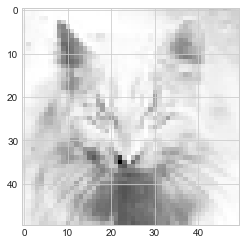

Train Dog Image


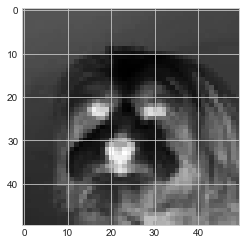

Train Wild Image


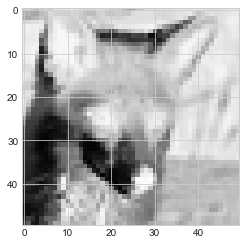

In [23]:
# Visualizing Training data
print('Train Cat Image')
plt.imshow(cat_train[0])
plt.show()

# Visualizing Training data
print('Train Dog Image')
plt.imshow(dog_train[0])
plt.show()

# Visualizing Training data
print('Train Wild Image')
plt.imshow(wild_train[0])
plt.show()

In [15]:
with open('cat_train_greyscale','wb') as data_file:
     pickle.dump(cat_train, data_file)
with open('dog_train_greyscale','wb') as data_file:
     pickle.dump(dog_train, data_file)        
with open('wild_train_greyscale','wb') as data_file:
     pickle.dump(wild_train, data_file)

In [16]:
#Load the data - No need to do Feature Engineering again
with open('cat_train_greyscale','rb') as fe_data_file:
     ola = pickle.load(fe_data_file)

In [22]:
x_train = np.concatenate((cat_train,dog_train,wild_train),axis=0) # training dataset
x_train_label = np.asarray(label) # label array containing 0, 1, and 2
x_train_label = x_train_label.reshape(x_train_label.shape[0],1)

print("cat:",np.shape(cat_train) , "dog:",np.shape(dog_train), "wild:",np.shape(wild_train))
print("train_dataset:",np.shape(x_test), "train_values:",np.shape(x_test_label))

cat: (3957, 50, 50) dog: (3667, 50, 50) wild: (3666, 50, 50)
train_dataset: (11290, 50, 50) train_values: (11290, 1)


In [105]:
train_images = x_train.reshape((len(x_train), 50, 50, 1))
train_images = train_images.astype('float32') / 255
train_labels = to_categorical(x_train_label)

## Test

In [70]:
img_size = 50
cat_val = []
dog_val = []
wild_val = []
val_label = []

val_path = r'C:\Users\Pedro\Documents\Python Scripts\cv_animalfaces\input\validation'

for i in os.listdir(val_cat): # all val cat images
    if os.path.isfile(val_path + "\cats\\" + i): # check image in file
        cat = Image.open(val_path + "\cats\\" + i).convert("L") # converting grey scale 
        cat = cat.resize((img_size,img_size), Image.ANTIALIAS) # resizing to 50,50
        cat = np.asarray(cat)/255 # bit format
        cat_val.append(cat)
        val_label.append(0)
        
for i in os.listdir(val_dog): # all val dog images
    if os.path.isfile(val_path + "\dogs\\" + i): # check image in file
        dog = Image.open(val_path + "\dogs\\" + i).convert("L") # converting grey scale 
        dog = dog.resize((img_size,img_size), Image.ANTIALIAS) # resizing to 50,50
        dog = np.asarray(dog)/255 # bit format
        dog_val.append(dog)
        val_label.append(1)
        
        
for i in os.listdir(val_wild): # all val wild images
    if os.path.isfile(val_path + "\wild\\" + i): # check image in file
        wild = Image.open(val_path + "\wild\\" + i).convert("L") # converting grey scale 
        wild = wild.resize((img_size,img_size), Image.ANTIALIAS) # resizing to 50,50
        wild = np.asarray(wild)/255 # bit format
        wild_val.append(wild)
        val_label.append(2)

In [71]:
x_val = np.concatenate((cat_val,dog_val,wild_val),axis=0) # training dataset
x_val_label = np.asarray(val_label) # label array containing 0, 1, and 2
x_val_label = x_val_label.reshape(x_val_label.shape[0],1)

print("cat:",np.shape(cat_val) , "dog:",np.shape(dog_val), "wild:",np.shape(wild_val))
print("train_dataset:",np.shape(x_val), "train_values:",np.shape(x_val_label))

cat: (847, 50, 50) dog: (785, 50, 50) wild: (785, 50, 50)
train_dataset: (2417, 50, 50) train_values: (2417, 1)


In [72]:
val_images = x_val.reshape((len(x_val), 50, 50, 1))
val_images = val_images.astype('float32') / 255
val_labels = to_categorical(val_label)

# Data augmentation

In [155]:
datagen = ImageDataGenerator(
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')

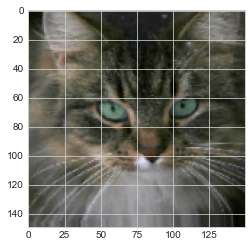

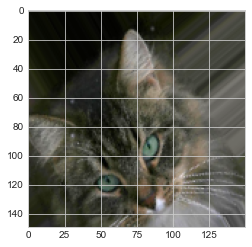

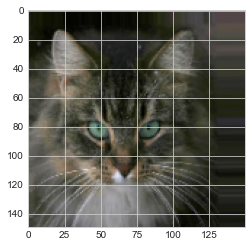

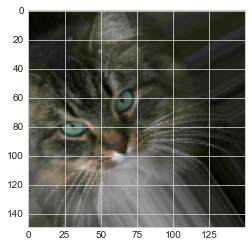

In [160]:
fnames = [os.path.join(train_cats_dir, fname) for
fname in os.listdir(train_cats_dir)]
img_path = fnames[3]
img = image.load_img(img_path, target_size=(150, 150))
x = image.img_to_array(img)
x = x.reshape((1,) + x.shape)
i = 0
for batch in datagen.flow(x, batch_size=1):
    plt.figure(i)
    imgplot = plt.imshow(image.array_to_img(batch[0]))
    i += 1
    if i % 4 == 0:
        break
plt.show()

# Build the model

In [117]:
for data_batch, labels_batch in train_generator:
    print('data batch shape:', data_batch.shape)
    print('labels batch shape:', labels_batch.shape)
    break

data batch shape: (20, 150, 150, 3)
labels batch shape: (20, 3)


In [116]:
train_dir = r'C:\Users\Pedro\Documents\Python Scripts\cv_animalfaces\input\train'
validation_dir = r'C:\Users\Pedro\Documents\Python Scripts\cv_animalfaces\input\validation'

train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=20,
    class_mode='categorical')

validation_generator = test_datagen.flow_from_directory(
    validation_dir,
    target_size=(150, 150),
    batch_size=20,
    class_mode='categorical')

Found 11290 images belonging to 3 classes.
Found 2417 images belonging to 3 classes.


In [149]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(3, activation='softmax'))

model.compile(optimizer=optimizers.RMSprop(lr=1e-4), loss='categorical_crossentropy', metrics=['accuracy'])

In [150]:
model.summary()

Model: "sequential_14"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_50 (Conv2D)           (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_44 (MaxPooling (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_51 (Conv2D)           (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_45 (MaxPooling (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_52 (Conv2D)           (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_46 (MaxPooling (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_53 (Conv2D)           (None, 15, 15, 128)     

In [151]:
STEP_SIZE_TRAIN=train_generator.n//train_generator.batch_size
STEP_SIZE_VALID=validation_generator.n//validation_generator.batch_size

In [152]:
history = model.fit_generator(
    train_generator,
    steps_per_epoch=STEP_SIZE_TRAIN,
    epochs=30,
    validation_data=validation_generator,
    validation_steps=STEP_SIZE_VALID)

Epoch 1/30
564/564 [==============================] - 1263s 2s/step - loss: 0.5040 - acc: 0.7927 - val_loss: 0.3102 - val_acc: 0.8775
Epoch 2/30
564/564 [==============================] - 1314s 2s/step - loss: 0.2041 - acc: 0.9264 - val_loss: 0.1387 - val_acc: 0.9517
Epoch 3/30
564/564 [==============================] - 1285s 2s/step - loss: 0.1277 - acc: 0.9540 - val_loss: 0.1043 - val_acc: 0.9629
Epoch 4/30
564/564 [==============================] - 1271s 2s/step - loss: 0.0923 - acc: 0.9660 - val_loss: 0.1017 - val_acc: 0.9658
Epoch 5/30
564/564 [==============================] - 1275s 2s/step - loss: 0.0689 - acc: 0.9748 - val_loss: 0.0905 - val_acc: 0.9683
Epoch 6/30
564/564 [==============================] - 1284s 2s/step - loss: 0.0532 - acc: 0.9820 - val_loss: 0.0918 - val_acc: 0.9712
Epoch 7/30
564/564 [==============================] - 1303s 2s/step - loss: 0.0394 - acc: 0.9862 - val_loss: 0.1011 - val_acc: 0.9683
Epoch 8/30
564/564 [==============================] - 1279s 2s

In [153]:
model.save('model_generator_epoch30.h5')

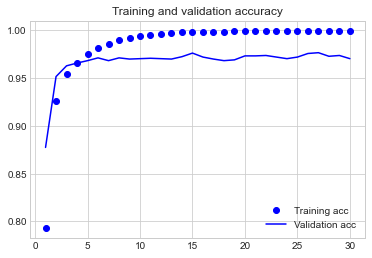

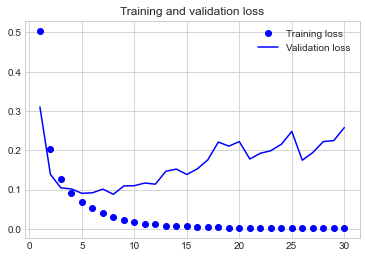

In [154]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()